My company is expanding into new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. I am charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. I must then translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase. To achieve this, I have used data from Aviation Accident Databases, specifically 'AviationData.csv'.

In [ ]:
# Import the necessary libaries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [225]:
# Load the dataset
df = pd.read_csv("AviationData.csv", encoding="latin-1", low_memory=False)
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [227]:
# Find missing values
df.isna()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [228]:
# Find the sum of missing values for each variable
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [229]:
# Keep only rows where 'Investigation.Type' is 'Accident'
df = df[df['Investigation.Type'] == 'Accident']

The business is focussing on airplanes and not helicopters hence 'Aircraft.Category' rows with Helicopter should be deleted. 

In [230]:
# Delete 'Aircraft.Category' rows with Helicopter
df = df[(df['Aircraft.Category'] == 'Airplane') | (df['Aircraft.Category'].isna())]


The variables (Airport.Name, Airport.Code, and Latitude and Longitude whihc arelocation-related  and not aircraft-specific, do not contribute meaningfully and contain extreme missing data. Hence, dropping them is the best approach for cleaner, more reliable analysis. Aircraft.Category, while useful, it has too much missing data to be reliable.
FAR.Description, Schedule, Air.Carrier are regulatory and operational details that do not directly determine aircraft risk in your study. To be sure, we will determine what percentage of rows in this column contain missings values. 

In [231]:
# Checking what percentage of rows in these columns contain missing values
missing_percentages = {col: df[col].isna().mean() * 100 for col in [
    'Airport.Name', 'Latitude', 'Longitude', 'Airport.Code', 
    'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier', 'Broad.phase.of.flight'
]}

# Print results
for col, perc in missing_percentages.items():
    print(f"Percentage of missing values in '{col}': {perc:.2f}%")


Percentage of missing values in 'Airport.Name': 39.24%
Percentage of missing values in 'Latitude': 63.21%
Percentage of missing values in 'Longitude': 63.22%
Percentage of missing values in 'Airport.Code': 42.21%
Percentage of missing values in 'Aircraft.Category': 67.72%
Percentage of missing values in 'FAR.Description': 67.81%
Percentage of missing values in 'Schedule': 88.02%
Percentage of missing values in 'Air.carrier': 84.62%
Percentage of missing values in 'Broad.phase.of.flight': 26.85%


In [232]:
# Checking the unique values of the variables highlighted above
unique_values = {col: df[col].nunique() for col in [
    'Airport.Name', 'Latitude', 'Longitude', 'Airport.Code', 
    'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier', 'Broad.phase.of.flight'
]}

# Print results
for col, count in unique_values.items():
    print(f"Number of unique values in '{col}': {count}")


Number of unique values in 'Airport.Name': 23452
Number of unique values in 'Latitude': 22496
Number of unique values in 'Longitude': 23659
Number of unique values in 'Airport.Code': 9848
Number of unique values in 'Aircraft.Category': 1
Number of unique values in 'FAR.Description': 26
Number of unique values in 'Schedule': 3
Number of unique values in 'Air.carrier': 10669
Number of unique values in 'Broad.phase.of.flight': 12


The variables 'Airport.Name', 'Latitude', 'Longitude', 'Airport.Code', 'Aircraft.Category', 'FAR.Description', 'Schedule', and 'Air.carrier' have many missing values and they do not contribute meaningfully, hence it is best for us to just drop this column completely.

In [233]:
# Drop specified columns
df = df.drop(columns=['Airport.Name', 'Aircraft.Category', 'Broad.phase.of.flight', 'Latitude', 'Longitude', 'Airport.Code', 
                      'FAR.Description', 'Schedule', 'Air.carrier', 'Country'])

# Display the first few rows to confirm
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,NC6404,Stinson,108-3,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,N5069P,Piper,PA24-180,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",Fatal(3),Destroyed,N5142R,Cessna,172M,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",Fatal(2),Destroyed,N1168J,Rockwell,112,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",Fatal(1),Destroyed,N15NY,Cessna,501,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause,16-04-1980


In [234]:
# Checking for the remaining missing values
remaining_missing_values = df.isna().sum()
print(remaining_missing_values)


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     38
Injury.Severity             271
Aircraft.damage            1321
Registration.Number         996
Make                         33
Model                        58
Amateur.Built                56
Number.of.Engines          4232
Engine.Type                4561
Purpose.of.flight          3678
Total.Fatal.Injuries      10214
Total.Serious.Injuries    11371
Total.Minor.Injuries      10859
Total.Uninjured            5589
Weather.Condition          2559
Report.Status              4286
Publication.Date          12883
dtype: int64


The variables 'Injury.Severity', 'Aircraft.damage', 'Make', 'Model', 'Amateur.Built','Number.of.Engines', 'Engine.Type', 'Purpose.of.flight', and  'Weather.Condition' have missing values that are replaced by the mode of each variable

In [235]:
# List of columns to replace missing values with their mode
columns_to_fill = [
    'Injury.Severity', 'Aircraft.damage', 'Make', 'Model', 'Amateur.Built', 
    'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight', 'Weather.Condition'
]

# Replacing missing values with the mode of each column
for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify changes
print(df[columns_to_fill].isna().sum())  # Check if missing values are filled


Injury.Severity      0
Aircraft.damage      0
Make                 0
Model                0
Amateur.Built        0
Number.of.Engines    0
Engine.Type          0
Purpose.of.flight    0
Weather.Condition    0
dtype: int64


Histogram is pivotal in checking the distribution of data. In relation to this data, I would like to check 
the distribution of **Total.Fatal.Injuries**, **Total.Serious.Injuries**, **Total.Minor.Injuries** and **Total.Uninjured**.

From the visualization above, we can see the data has a slightly positive skew. Replace all missing values in the 'Total.Fatal.Injuries' column with the median of the column.

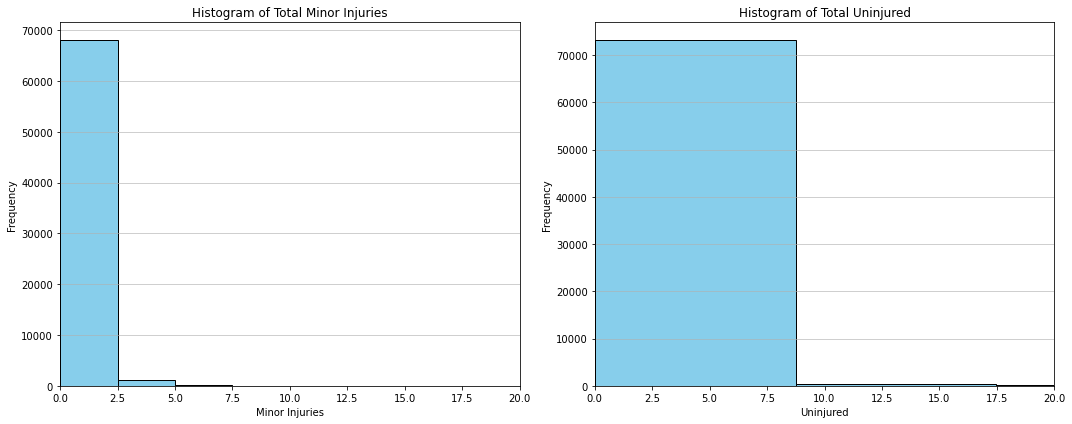

Mean Total Minor Injuries: 0.36
Median Total Minor Injuries: 0.00
Mean Total Uninjured: 3.34
Median Total Uninjured: 1.00


In [236]:
# Histogram for Total Minor Injuries and Total Uninjured 
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for Total Serious Injuries
axes[0].hist(df['Total.Minor.Injuries'].dropna(), bins=80, color='skyblue', edgecolor='black')
axes[0].set_xlim(0, 20)
axes[0].set_title('Histogram of Total Minor Injuries')
axes[0].set_xlabel('Minor Injuries')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.75)

# Histogram for Total Uninjured
axes[1].hist(df['Total.Uninjured'].dropna(), bins=80, color='skyblue', edgecolor='black')
axes[1].set_xlim(0, 20)
axes[1].set_title('Histogram of Total Uninjured')
axes[1].set_xlabel('Uninjured')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', alpha=0.75)

# Adjust layout
plt.tight_layout()
plt.show()

# Calculate and print mean & median for both
mean_Total_Minor_Injuries = df['Total.Minor.Injuries'].mean()
median_Total_Minor_Injuries = df['Total.Minor.Injuries'].median()

mean_Total_Uninjured = df['Total.Uninjured'].mean()
median_Total_Uninjured = df['Total.Uninjured'].median()

print(f"Mean Total Minor Injuries: {mean_Total_Minor_Injuries:.2f}")
print(f"Median Total Minor Injuries: {median_Total_Minor_Injuries:.2f}")
print(f"Mean Total Uninjured: {mean_Total_Uninjured:.2f}")
print(f"Median Total Uninjured: {median_Total_Uninjured:.2f}")


From the visualization above, we can see the data has a slightly positive skew. Replace all missing values in the *Total.Minor.Injuries* and *Total.Uninjured* columns with the median of the columns.

In [237]:
# Replacing missing values with median
df['Total.Minor.Injuries'].fillna(median_Total_Minor_Injuries, inplace=True)
df['Total.Uninjured'].fillna(median_Total_Uninjured, inplace=True)

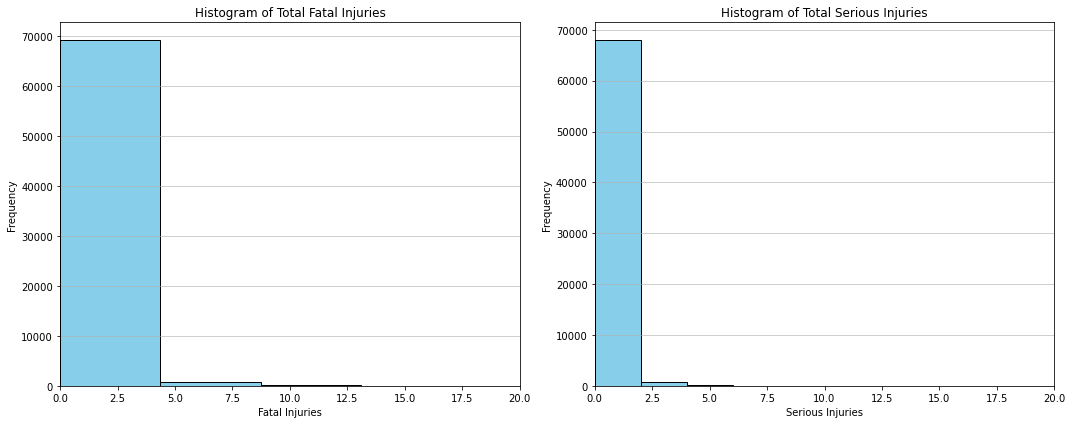

Mean Total Fatal Injuries: 0.68
Median Total Fatal Injuries: 0.00
Mean Total Serious Injuries: 0.28
Median Total Serious Injuries: 0.00


In [238]:
# Histogram for Total Fatal Injuries and Total Serious Injiuries 
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for Total Fatal Injuries
axes[0].hist(df['Total.Fatal.Injuries'].dropna(), bins=80, color='skyblue', edgecolor='black')
axes[0].set_xlim(0, 20)
axes[0].set_title('Histogram of Total Fatal Injuries')
axes[0].set_xlabel('Fatal Injuries')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', alpha=0.75)

# Histogram for Total Serious Injuries
axes[1].hist(df['Total.Serious.Injuries'].dropna(), bins=80, color='skyblue', edgecolor='black')
axes[1].set_xlim(0, 20)
axes[1].set_title('Histogram of Total Serious Injuries')
axes[1].set_xlabel('Serious Injuries')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', alpha=0.75)

# Adjust layout
plt.tight_layout()
plt.show()

# Calculate and print mean & median for both
mean_Total_Fatal_Injuries = df['Total.Fatal.Injuries'].mean()
median_Total_Fatal_Injuries = df['Total.Fatal.Injuries'].median()

mean_Total_Serious_Injuries = df['Total.Serious.Injuries'].mean()
median_Total_Serious_Injuries = df['Total.Serious.Injuries'].median()

print(f"Mean Total Fatal Injuries: {mean_Total_Fatal_Injuries:.2f}")
print(f"Median Total Fatal Injuries: {median_Total_Fatal_Injuries:.2f}")
print(f"Mean Total Serious Injuries: {mean_Total_Serious_Injuries:.2f}")
print(f"Median Total Serious Injuries: {median_Total_Serious_Injuries:.2f}")


From the visualization above, we can see the data has a slightly positive skew. Replace all missing values in the *Total.Fatal.Injuries* and *Total.Serious.Injuries* columns with the median of the columns.

In [239]:
# Replacing missing values with median
df['Total.Fatal.Injuries'].fillna(median_Total_Fatal_Injuries, inplace=True)
df['Total.Serious.Injuries'].fillna(median_Total_Serious_Injuries, inplace=True)

Given that the registration number is unique and the missing numbers are not specific to one model, I wll use a placeholder "UNKNOWN"

In [240]:
# Replacing the missing values in 'Registration.Number' with a placeholder'UNKNOWN'
df['Registration.Number'] = df['Registration.Number'].fillna('UNKNOWN')

# Verify the changes
print(df['Registration.Number'].isna().sum())  # Corrected column name syntax


0


The missing location of accidents have been recorded as unknown 

In [241]:
# Replacing the missing values in 'Location' with a placeholder 'UNKNOWN'
df['Location'] = df['Location'].fillna('UNKNOWN')

# Verify the changes
print(df['Location'].isna().sum())  # Corrected column name syntax


0


`Report.Status` has either 'Probable Cause' has a response or missing values. I will replace the missing values with 'Probable Cause'.

In [242]:
# Replacing the missing values with 'Probable Cause'
df['Report.Status'] = df['Report.Status'].fillna('Probable Cause')
# Verify the changes 
print(df['Report.Status'].isna().sum())


0


The missing dates will be filled using a distinguishable defaul date as a placeholder.

In [243]:
# filling missing values with a clearly distinguishable default date
df['Publication.Date'] = df['Publication.Date'].fillna('01-01-1900')  # Using an unrealistic past date


In [244]:
# check how many null values remain in the dataset
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
Publication.Date          0
dtype: int64

In [245]:
# Mooney Aircraft Corporation has varying names hence there is need for standardization in the 'Make' column
df['Make'] = df['Make'].replace({
    'Mooney Aircraft': 'Mooney Aircraft Corporation',
    'Mooney Aircraft Corp': 'Mooney Aircraft Corporation',
    'Mooney Aircraft Corporation': 'Mooney Aircraft Corporation',
    'Mooney Airplane Company, Inc.': 'Mooney Aircraft Corporation',
    'Mooney International Corp': 'Mooney Aircraft Corporation',
    'Moon': 'Mooney Aircraft Corporation'
})


**Descriptive Statistics on Aircraft Risks**
Checking for duplicate variables, standardizing the variable names to lower case and identifying duplicate values 

In [246]:
# Standardize the 'Make' column by converting to lowercase and capitalizing first letter
df['Make'] = df['Make'].str.strip().str.lower().str.title()

# Summarize accident frequency per aircraft make
make_counts = df.groupby('Make')['Event.Id'].count().sort_values(ascending=False)

# Display top 5 most frequent aircraft makes
print(make_counts.head(10))



Make
Cessna         26826
Piper          14684
Beech           5177
Bell            1775
Boeing          1360
Mooney          1311
Grumman         1158
Bellanca        1040
Air Tractor      689
Hughes           683
Name: Event.Id, dtype: int64


The airplane with the most accident cases is Cessna (26826 accidents). It is followed by Piper (14684 cases) then Beech (with 5177 cases). Money Aircraft and Mooore have the least cases of accidents but they are rarely used. 

In [247]:
# Summary Statistics for Fatal Injuries 
df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
count,80443.000000,80443.000000,80443.000000
mean,0.597889,0.243191,0.310008
std,5.379790,1.450746,1.684115
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,349.000000,161.000000,200.000000


The mean total fatal injuries is **0.60** while that of total serious injuries is **0.24**. Total minor injuries had a mean of **0.31**. Hence, the number of total fatal injuries were higher as compared to the other two. 

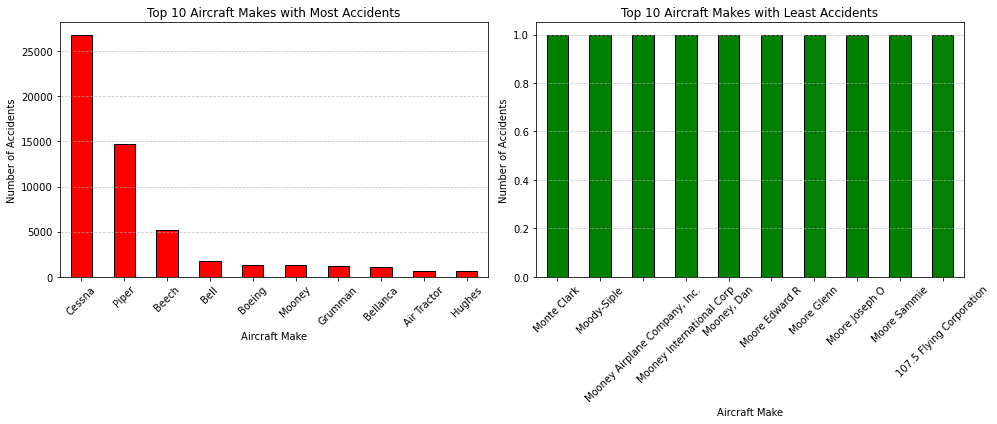

In [248]:
# Count the number of accidents per aircraft make
make_accidents = df.groupby('Make')['Event.Id'].count().sort_values(ascending=False)

# Airplanes with most and least accidents
top_10_most_accidents = make_accidents.head(10)
top_10_least_accidents = make_accidents.tail(10)

# Subplots for visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot most accidents
top_10_most_accidents.plot(kind='bar', ax=axes[0], color='red', edgecolor='black')
axes[0].set_title("Top 10 Aircraft Makes with Most Accidents")
axes[0].set_xlabel("Aircraft Make")
axes[0].set_ylabel("Number of Accidents")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot least accidents
top_10_least_accidents.plot(kind='bar', ax=axes[1], color='green', edgecolor='black')
axes[1].set_title("Top 10 Aircraft Makes with Least Accidents")
axes[1].set_xlabel("Aircraft Make")
axes[1].set_ylabel("Number of Accidents")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


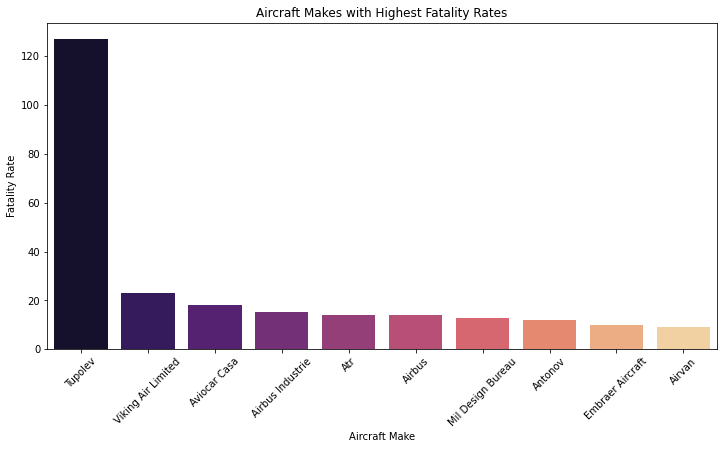

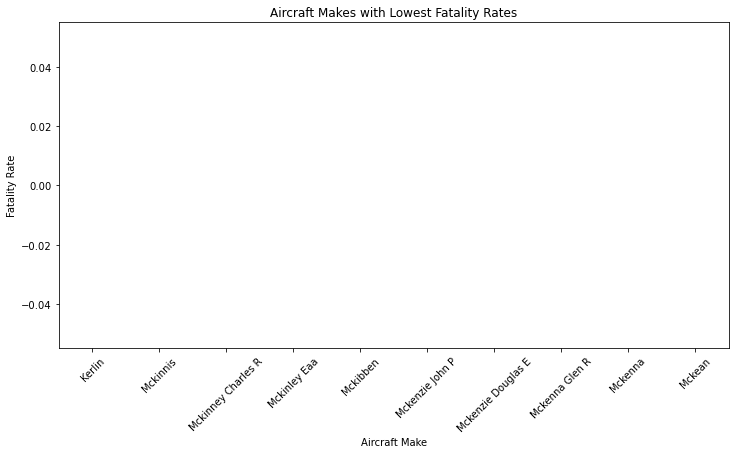

In [252]:
# Fatality Rate Calculation
df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce').fillna(0)
fatality_rates = df.groupby('Make')['Total.Fatal.Injuries'].sum() / df.groupby('Make')['Make'].count()

# Plot: Highest Fatality Rates
top_fatality_rates = fatality_rates.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_fatality_rates.index, y=top_fatality_rates.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Aircraft Makes with Highest Fatality Rates")
plt.xlabel("Aircraft Make")
plt.ylabel("Fatality Rate")
plt.show()

# Plot: Lowest Fatality Rates
low_fatality_rates = fatality_rates.sort_values(ascending=True).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=low_fatality_rates.index, y=low_fatality_rates.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Aircraft Makes with Lowest Fatality Rates")
plt.xlabel("Aircraft Make")
plt.ylabel("Fatality Rate")
plt.show()


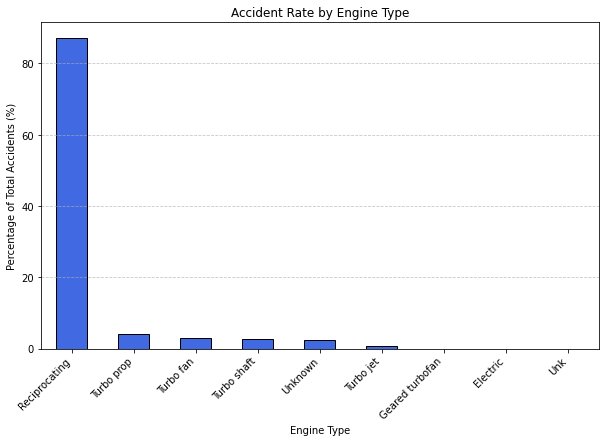

In [161]:
# Clean 'Engine.Type' column (strip spaces and standardize casing)
df['Engine.Type'] = df['Engine.Type'].str.strip().str.lower().str.capitalize()

# Count accident frequency per engine type
engine_accidents = df['Engine.Type'].value_counts()

# Compute percentage of total accidents for normalization
engine_accidents_percent = (engine_accidents / engine_accidents.sum()) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
engine_accidents_percent.sort_values(ascending=False).plot(kind='bar', color='royalblue', edgecolor='black')

# Customize plot
plt.title("Accident Rate by Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Percentage of Total Accidents (%)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


Based on the Bar Graph above, the business should focus on buying Airplanes with Electric, Geared turbofan and Turbo jet engines since the register fewer accidents as compared to others. 

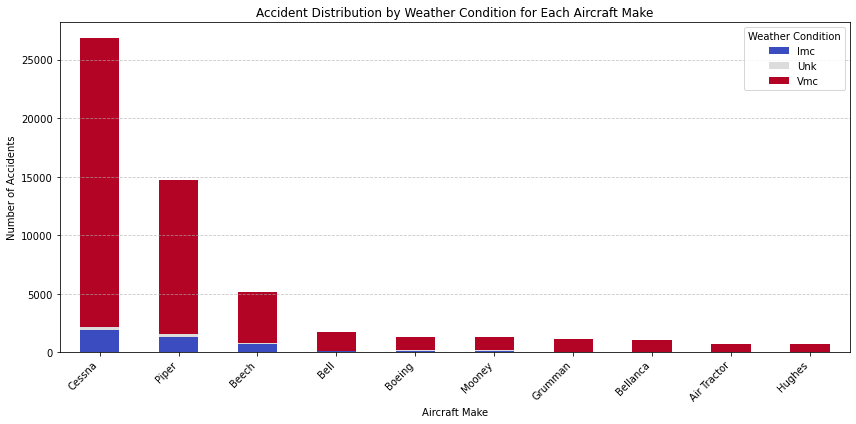

In [253]:
# Ensure Weather.Condition values are consistent (lowercase and capitalized)
df['Weather.Condition'] = df['Weather.Condition'].str.strip().str.capitalize()

# Count the number of accidents per aircraft make and weather condition
weather_accidents = df.groupby(['Make', 'Weather.Condition'])['Event.Id'].count().unstack(fill_value=0)

# Select the top 10 aircraft makes with the most accidents
top_makes = df['Make'].value_counts().head(10).index
weather_accidents_top = weather_accidents.loc[top_makes]

# Plot stacked bar chart
ax = weather_accidents_top.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')

# Formatting the plot
plt.title("Accident Distribution by Weather Condition for Each Aircraft Make")
plt.xlabel("Aircraft Make")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Weather Condition")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

Based on the above graph, most accidents were as a result of negligence, mechanical failure, or mid air collisisons as indicated by the high Visual Meteorological Conditions (VMC) scores. Instrument Meteorological Conditions (IMC) had little impact on the registed accidents.

Correlation Analysis: Relationship between Engine Type and Fatality Rate

In [254]:
from scipy.stats import spearmanr

# Convert Engine Type to numeric labels
engine_mapping = {engine: idx for idx, engine in enumerate(df['Engine.Type'].unique())}
df['engine_numeric'] = df['Engine.Type'].map(engine_mapping)

# Compute correlation
corr, p_value = spearmanr(df['engine_numeric'], df['Total.Fatal.Injuries'])

print(f"Spearman Correlation: {corr:.3f}, p-value = {p_value:.5f}")


Spearman Correlation: 0.027, p-value = 0.00000


The Spearman correlation of 0.027 is very close to 0, suggesting almost no monotonic relationship between Engine.Type and Total.Fatal.Injuries. This means that different engine types do not significantly impact fatal injuries in a consistent increasing or decreasing pattern.

Based on the visuals and analysis above, the organization should invest in Mooney Aircraft Corporation simce it has very few accidents and its engine is safe for use. 

Exporting data back out

In [170]:
# Write data to a CSV file 
df.to_csv('AirplaneAccidents.csv', index=False) 